## 데이터 로딩

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 25
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
df = pd.read_csv('./서울특별시 공공자전거 대여이력 정보_2209.csv', encoding='cp949')

In [81]:
df.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
8,SPB-57948,2022-09-01 00:00:00,354,포르투갈 대사관 앞,0,2022-09-01 00:03:33,03413,종로플레이스,0,3,"1,200.0000",1997,M,내국인,ST-170,ST-1810
10,SPB-58852,2022-09-01 00:00:00,2164,관악우체국,0,2022-09-01 00:03:51,02190,도원맨션,0,3,560.0000,1998,F,내국인,ST-1259,ST-2374


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934841 entries, 0 to 4934840
Data columns (total 16 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
dtypes: float64(1), int64(3), object(12)
memory usage: 4.2 GB


## 데이터 탐색

In [6]:
for column in ['반납거치대', '생년', '성별', '이용자종류']:
    print(f'{column} - {df[column].unique()}')

반납거치대 - ['0' '99' '\\N']
생년 - ['2006' '1957' '2004' '\\N' '1993' '1997' '2000' '1982' '1998' '1959'
 '1999' '1994' '1995' '1985' '1988' '2003' '1970' '1963' '2002' '1991'
 '1984' '1996' '1989' '2001' '1992' '1980' '1962' '1971' '1977' '1981'
 '1973' '1960' '1974' '1990' '1964' '1975' '1987' '2005' '1979' '1966'
 '1978' '1986' '1965' '1968' '1958' '1983' '1967' '1972' '1969' '1901'
 '1961' '1976' '1904' '2007' '2020' '2096' '2083' '1956' '1955' '1953'
 '1954' '2077' '1952' '1938' '2094' '1906' '2093' '2098' '1942' '1943'
 '1937' '1948' '1939' '1914' '1950' '2009' '1949' '2076' '1951' '1936'
 '1945' '2019' '2064' '2097' '1941' '2068' '2008' '1902' '2081' '2065'
 '2069' '1946' '2062' '1947' '1905' '2079' '2012' '1944' '2090' '2095'
 '1935' '2011' '2070' '2074' '2087' '1903' '1932' '2085' '1934' '2078'
 '1928' '2080' '2010' '1940' '2086' '2084' '2073' '1933' '1912' '2060'
 '1907' '2063' '2099' '2016' '2015' '2049' '2059' '2091' '2051' '2092'
 '1909' '2088' '1922' '2021' '2082' '2075' '2072

## 데이터 전처리

In [13]:
df.isna().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간(분)     0
이용거리(M)     0
생년          0
성별          0
이용자종류       0
대여대여소ID     0
반납대여소ID     0
dtype: int64

In [11]:
df[df.성별.isna()].head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
5,SPB-60707,2022-09-01 00:00:20,1987,개봉아이파크아파트 앞,0,2022-09-01 00:02:52,01936,개봉역 1번 출구 자전거보관서쪽,0,2,920.0000,1997,NaN,내국인,ST-1522,ST-870
32,SPB-82038,2022-09-01 00:01:22,2340,삼호물산버스정류장(23370) 옆,99,2022-09-01 00:05:41,02276,영동1교 (양재천근린공원),99,4,"1,020.0000",1984,NaN,내국인,ST-821,ST-1168


In [12]:
df = df.dropna()

In [32]:
for column in ['반납거치대', '생년', '성별', '이용자종류']:
    print(f'{column} - {df[column].unique()}')

반납거치대 - ['0' '99']
생년 - ['2006' '2004' '1993' '1982' '1997' '1998' '1999' '1995' '1988' '1970'
 '1963' '1994' '1989' '1962' '2002' '2003' '2001' '1959' '1981' '1973'
 '1984' '1996' '1992' '1974' '2000' '1990' '1975' '2005' '1960' '1978'
 '1986' '1965' '1991' '1977' '1968' '1971' '1983' '1964' '1967' '1972'
 '1969' '1958' '1961' '1980' '1957' '1976' '1904' '1979' '1987' '2007'
 '1985' '1966' '2020' '2096' '2083' '1956' '1955' '2077' '1954' '1953'
 '1952' '1938' '2094' '1906' '2093' '2098' '1942' '1943' '1937' '1948'
 '1939' '1949' '2076' '1901' '1951' '1945' '2019' '2064' '2097' '1941'
 '2068' '2008' '2081' '2065' '1936' '1950' '2069' '1946' '2062' '1947'
 '1905' '2079' '2090' '2095' '1935' '2011' '2070' '2074' '2087' '1903'
 '2009' '1932' '1944' '2085' '1934' '2078' '1928' '2080' '2010' '1940'
 '2086' '2084' '2073' '1933' '2060' '2063' '2099' '2016' '2015' '2049'
 '2059' '2091' '2051' '1902' '2092' '2088' '2021' '1907' '2082' '2075'
 '2072' '2058' '2089' '2071' '0000' '2014' '2017' '20

In [17]:
df = df[df.성별 != '\\N']

In [22]:
df = df[df.생년 != '\\N']

In [30]:
df = df[df.반납거치대 != '\\N']

In [20]:
df['성별'] = df['성별'].replace({'m':'M', 'f':'F'})

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2795345 entries, 8 to 4934826
Data columns (total 16 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int32  
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        int32  
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
dtypes: float64(1), int32(2), int64(3), object(10)
memory usage: 341.2+ MB


In [36]:
df['반납거치대'] = df['반납거치대'].astype('int')

In [42]:
df = df[df['이용시간(분)'] != 0]

In [47]:
df = df[df['이용거리(M)'] != 0 ]

In [52]:
df.loc[:, '생년'] = df['생년'].astype('int')

In [60]:
df['생년'].value_counts().sort_index()

생년
1900        27
1901        62
1902        47
1903       163
1904       150
1905       239
1906       157
1907       171
1908        18
1910         5
1916        11
1920        13
1921         2
1927        38
1928        40
1929         2
1930         3
1931         1
1932        51
1933       235
1934       155
1935       231
1936       231
1937       350
1938       170
1939       180
1940       221
1941       293
1942       469
1943       307
1944       726
1945       501
1946       547
1947       635
1948      1609
1949       858
1950      1190
1951      1351
1952      2159
1953      2414
1954      4004
1955      4729
1956      4604
1957      6796
1958      8066
1959      9945
1960     12906
1961     15353
1962     15381
1963     16131
1964     18506
1965     20437
1966     22035
1967     27142
1968     28072
1969     32609
1970     35194
1971     37069
1972     37872
1973     38504
1974     41491
1975     37844
1976     39594
1977     40774
1978     40513
1979     47521
1980   

In [59]:
df = df[(df['생년'] != 0) & (df['생년'] <= 2022)]

## 가설검정 #1

- 가설 1: 성별이 대여이용시간에 영향을 미치는지 검증합니다.
* H0 : 남여간의 대여이용시간의 차이가 없다
* H1 : 남여간의 대여이용시간의 차이가 있다

In [77]:
from scipy.stats import ttest_ind, t, sem

In [65]:
female = df.loc[df.성별 == 'F', '이용시간(분)']
male = df.loc[df.성별 == 'M', '이용시간(분)']

In [73]:
s, pvalue = ttest_ind(male, female, alternative='two-sided')
print(f'2-way t-test statistics= {s:.4f}, p-value= {pvalue:.4f} --> {"H0기각" if pvalue < 0.05 else "H0채택"}')

2-way t-test statistics= -80.7262, p-value= 0.0000 --> H0기각


In [75]:
print(f'male= {male.mean():.4f}, female= {female.mean():.4f}')

male= 22.3096, female= 25.1117


* H0 : 남자의 이용시간이 여자의 이용시간보다 크거나 같다
* H1 : 남자의 이용시간이 여자의 이용시간보다 작다

In [76]:
s, pvalue = ttest_ind(male, female, alternative='less')
print(f'2-way t-test statistics= {s:.4f}, p-value= {pvalue:.4f} --> {"H0기각" if pvalue < 0.05 else "H0채택"}')

2-way t-test statistics= -80.7262, p-value= 0.0000 --> H0기각


In [80]:
ci_s, ci_e = t.interval(confidence=0.95, loc=male.mean(), scale=sem(male), df=len(male)-1)
print(f'male   95% confidence interval = {ci_s:,.4f} ~ {ci_e:,.4f}')

ci_s, ci_e = t.interval(confidence=0.95, loc=female.mean(), scale=sem(female), df=len(female)-1)
print(f'female 95% confidence interval = {ci_s:,.4f} ~ {ci_e:,.4f}')

male   95% confidence interval = 22.2670 ~ 22.3521
female 95% confidence interval = 25.0581 ~ 25.1653


- 가설 2: 이용자종류가 대여이용시간에 영향을 미치는지 검증합니다.

In [82]:
df['이용자종류'].value_counts()

이용자종류
내국인    2795296
비회원         49
Name: count, dtype: int64

In [83]:
nationals = df.loc[df.이용자종류 == '내국인', '이용시간(분)']
nonmembers = df.loc[df.이용자종류 == '비회원', '이용시간(분)']

In [84]:
s, pvalue = ttest_ind(nationals, nonmembers, alternative='two-sided')
print(f'2-way t-test statistics= {s:.4f}, p-value= {pvalue:.4f} --> {"H0기각" if pvalue < 0.05 else "H0채택"}')

2-way t-test statistics= -6.2992, p-value= 0.0000 --> H0기각


In [85]:
print(f'nationals= {nationals.mean():.4f}, nonmembers= {nonmembers.mean():.4f}')

nationals= 23.4334, nonmembers= 49.0612


- 가설 3: 성별이 이용거리에 영향을 미치는지 검증합니다.

In [86]:
female = df.loc[df.성별 == 'F', '이용거리(M)']
male = df.loc[df.성별 == 'M', '이용거리(M)']

In [87]:
s, pvalue = ttest_ind(male, female, alternative='two-sided')
print(f'2-way t-test statistics= {s:.4f}, p-value= {pvalue:.4f} --> {"H0기각" if pvalue < 0.05 else "H0채택"}')

2-way t-test statistics= -30.5763, p-value= 0.0000 --> H0기각


In [88]:
print(f'male= {male.mean():.4f}, female= {female.mean():.4f}')

male= 2713.6357, female= 2837.6793


In [89]:
ci_s, ci_e = t.interval(confidence=0.95, loc=male.mean(), scale=sem(male), df=len(male)-1)
print(f'male   95% confidence interval = {ci_s:,.4f} ~ {ci_e:,.4f}')

ci_s, ci_e = t.interval(confidence=0.95, loc=female.mean(), scale=sem(female), df=len(female)-1)
print(f'female 95% confidence interval = {ci_s:,.4f} ~ {ci_e:,.4f}')

male   95% confidence interval = 2,708.5705 ~ 2,718.7009
female 95% confidence interval = 2,831.5791 ~ 2,843.7795


## 가설검정 #2

- '생년'의 그룹에 따라 '이용거리'이 유의미하게 다를까요?

In [181]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt

In [182]:
temp = df[['생년', '이용거리(M)']].reset_index(drop=True)
temp.columns = ['year', 'distance']
temp.head()

,year,distance
0,1997,"1,200.0000"
1,1998,560.0000
2,1995,500.0000
3,1988,584.4100
4,1970,800.0000


In [194]:
temp['generation'] = pd.cut(temp.year, bins=[temp.year.min() - 1, 1990, 2000, temp.year.max() + 1], \
                            labels = ['< 2000', '2000', '> 2000'], right=True)
temp['generation'] = temp['generation'].astype('str')
temp.head()

,year,distance,generation
0,1997,"1,200.0000",2000
1,1998,560.0000,2000
2,1995,500.0000,2000
3,1988,584.4100,< 2000
4,1970,800.0000,< 2000


In [196]:
model = ols(formula='distance ~ C(generation)', data=temp).fit()
result = sm.stats.anova_lm(model, typ=1)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(generation),2.0000,"106,806,831,921.9263","53,403,415,960.9632","4,846.8402",0.0000
Residual,"2,795,342.0000","30,799,614,814,102.9258","11,018,191.9830",NaN,NaN


In [197]:
posthoc_result = pairwise_tukeyhsd(temp.distance, temp.generation, alpha=0.05)
posthoc_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
2000,< 2000,290.2882,0.0,280.2261,300.3503,True
2000,> 2000,-254.345,0.0,-268.9403,-239.7497,True
< 2000,> 2000,-544.6332,0.0,-558.9048,-530.3616,True


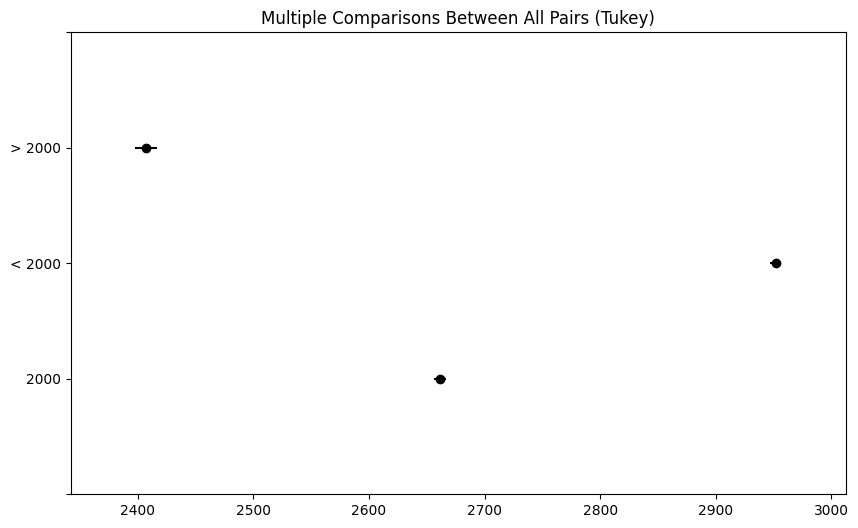

In [198]:
posthoc_result.plot_simultaneous()
plt.show()

## 상관분석

In [212]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr

In [203]:
df.corr(numeric_only=True)

,대여 대여소번호,대여거치대,반납거치대,이용시간(분),이용거리(M),생년
대여 대여소번호,1.0000,-0.0090,-0.0091,-0.0166,-0.0128,0.0014
대여거치대,-0.0090,1.0000,0.9978,-0.0285,-0.0435,-0.0146
반납거치대,-0.0091,0.9978,1.0000,-0.0287,-0.0432,-0.0145
이용시간(분),-0.0166,-0.0285,-0.0287,1.0000,0.6260,-0.0708
이용거리(M),-0.0128,-0.0435,-0.0432,0.6260,1.0000,-0.0633
생년,0.0014,-0.0146,-0.0145,-0.0708,-0.0633,1.0000


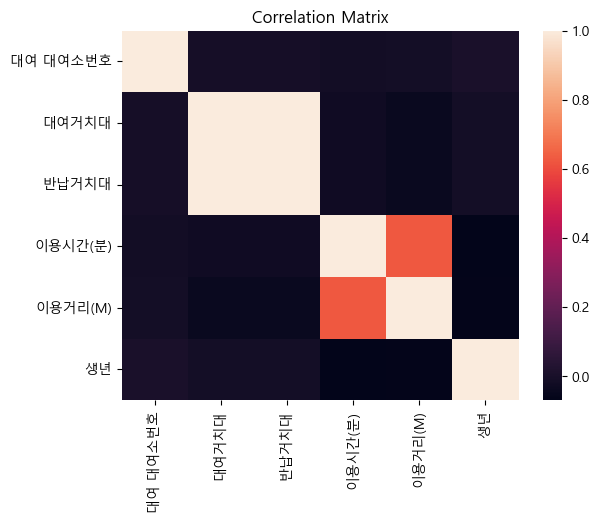

In [205]:
plt.rcParams["font.family"] = 'Malgun Gothic'

sns.heatmap(data=df.corr(numeric_only=True))
plt.title('Correlation Matrix')
plt.show()

In [207]:
temp = df.select_dtypes(exclude='object')

In [221]:
for col_x in temp.columns:
    for col_y in temp.columns:
        if col_x != col_y:
            s, pvalue = pearsonr(temp[col_x], temp[col_y], alternative='two-sided')
            print(f'Pearson Test {col_x}:{col_y} - statistics= {s:,.4f}, p-value= {pvalue:,.4f}')
    print('-' * 30)

Pearson Test 대여 대여소번호:대여거치대 - statistics= -0.0090, p-value= 0.0000
Pearson Test 대여 대여소번호:반납거치대 - statistics= -0.0091, p-value= 0.0000
Pearson Test 대여 대여소번호:이용시간(분) - statistics= -0.0166, p-value= 0.0000
Pearson Test 대여 대여소번호:이용거리(M) - statistics= -0.0128, p-value= 0.0000
Pearson Test 대여 대여소번호:생년 - statistics= 0.0014, p-value= 0.0177
------------------------------
Pearson Test 대여거치대:대여 대여소번호 - statistics= -0.0090, p-value= 0.0000
Pearson Test 대여거치대:반납거치대 - statistics= 0.9978, p-value= 0.0000
Pearson Test 대여거치대:이용시간(분) - statistics= -0.0285, p-value= 0.0000
Pearson Test 대여거치대:이용거리(M) - statistics= -0.0435, p-value= 0.0000
Pearson Test 대여거치대:생년 - statistics= -0.0146, p-value= 0.0000
------------------------------
Pearson Test 반납거치대:대여 대여소번호 - statistics= -0.0091, p-value= 0.0000
Pearson Test 반납거치대:대여거치대 - statistics= 0.9978, p-value= 0.0000
Pearson Test 반납거치대:이용시간(분) - statistics= -0.0287, p-value= 0.0000
Pearson Test 반납거치대:이용거리(M) - statistics= -0.0432, p-value= 0.0000
Pearson Test 반납거치대

In [222]:
result = pd.DataFrame(index=['VIF'])

for idx in range(len(temp.columns)):
    result[temp.columns[idx]] = round(variance_inflation_factor(temp, idx), 4)

result

,대여 대여소번호,대여거치대,반납거치대,이용시간(분),이용거리(M),생년
VIF,2.8732,242.7215,242.6992,2.7575,2.7827,3.8210


## 회귀분석

- 종속변수는 이용시간(분)
- 독립변수는 생년,	성별,	이용자종류

In [262]:
import statsmodels.api as sm

In [263]:
df.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
8,SPB-57948,2022-09-01 00:00:00,354,포르투갈 대사관 앞,0,2022-09-01 00:03:33,03413,종로플레이스,0,3,"1,200.0000",1997,M,내국인,ST-170,ST-1810
10,SPB-58852,2022-09-01 00:00:00,2164,관악우체국,0,2022-09-01 00:03:51,02190,도원맨션,0,3,560.0000,1998,F,내국인,ST-1259,ST-2374


In [264]:
target = df[['생년', '성별', '이용자종류', '이용시간(분)']]
target.columns = ['birth', 'gender', 'type', 'usetime']
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2795345 entries, 8 to 4934826
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   birth    int32 
 1   gender   object
 2   type     object
 3   usetime  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 96.0+ MB


In [265]:
dfXY = pd.get_dummies(data=target, columns=['gender', 'type'], drop_first=True).astype('int')
x = dfXY.drop(columns=['usetime'])
y = dfXY['usetime']

In [266]:
x = sm.add_constant(x)

In [267]:
model = sm.OLS(y, x).fit()

In [268]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                usetime   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7278.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:21:40   Log-Likelihood:            -1.3318e+07
No. Observations:             2795345   AIC:                         2.664e+07
Df Residuals:                 2795341   BIC:                         2.664e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        364.2380      2.747    132.591      0.000     358.854     369.622
birth         -0.1705      0.001   -123.456      0.000      -0.173      -0.168
gender_M      -3.0410      0.035    -87.711      0.000      -3.109      -2.973
type_비회원      26.1142      4.053      6.444      0.000      18.171      34.057
==============================================================================
Omnibus:                  4040937.812   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      12894649249.327
Skew:                           7.859   Prob(JB):                         0.00
Kurtosis:                     335.359   Cond. No.                     4.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [261]:
model.params, model.tvalues, model.pvalues

(const      364.2380
 birth       -0.1705
 gender_M    -3.0410
 type_비회원    26.1142
 dtype: float64,
 const       132.5913
 birth      -123.4560
 gender_M    -87.7110
 type_비회원      6.4437
 dtype: float64,
 const      0.0000
 birth      0.0000
 gender_M   0.0000
 type_비회원   0.0000
 dtype: float64)

In [244]:
x.head()

,birth,gender_M,type_비회원
8,1997,1,0
10,1998,0,0
17,1995,1,0
19,1988,0,0
24,1970,0,0


In [255]:
xtrain = pd.DataFrame([2020, 1, 1], index=x.columns).T
model.predict(xtrain)

0   48.8493
dtype: float64

In [257]:
predictions = model.get_prediction(xtrain)
predictions.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,48.8493,4.0654,40.8814,56.8173,-7.4925,105.1912


In [269]:
len(df)

2795345